In [4]:
# import the libraries and load the data
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/home/raghu/Documents/ml/libraries/matplotlib/netflixDataVisualization/netflix_titles.csv", encoding="UTF-8")

In [8]:
# clean data
df = df.dropna(subset=["type", "release_year", "rating", "country", "duration"])

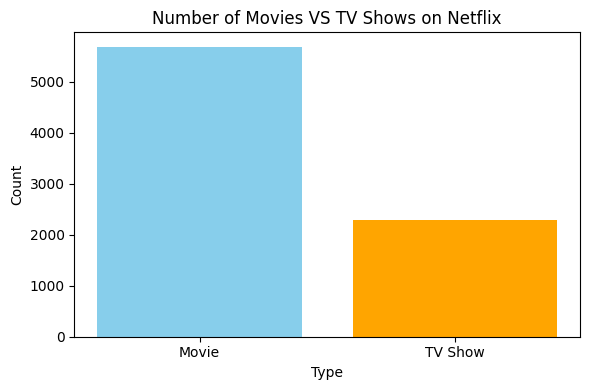

In [9]:
# bar chart movies vs tv shows
type_counts = df["type"].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(type_counts.index, type_counts.values, color=["skyblue", "orange"])
plt.title("Number of Movies VS TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("movies_vs_tvshows.png", dpi=300, bbox_inches="tight")
plt.show()

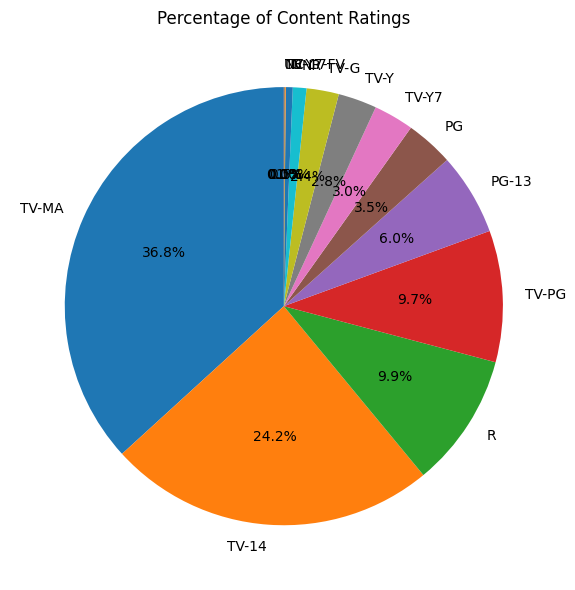

In [16]:
# pie chart rating counts
rating_counts = df["rating"].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Percentage of Content Ratings")
plt.tight_layout()
plt.savefig("content_ratings_pie.png", dpi=300, bbox_inches="tight")
plt.show()

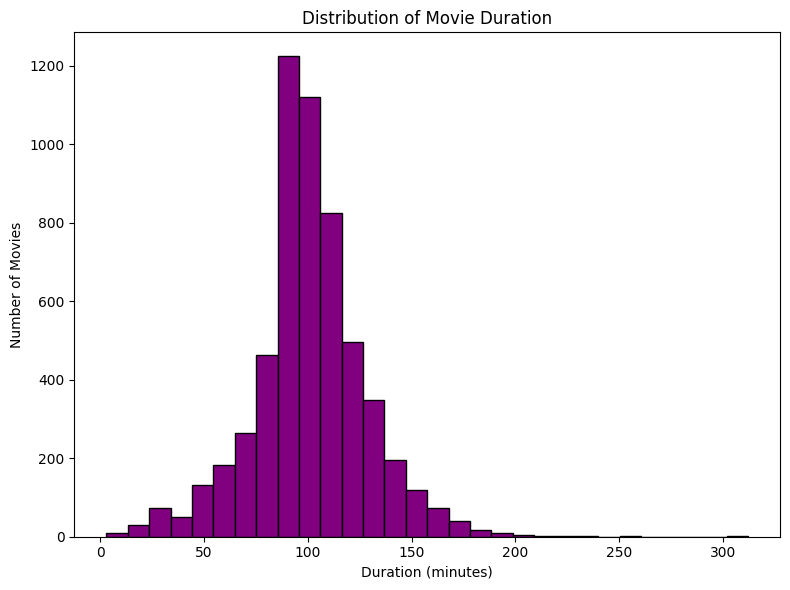

In [18]:
# movie duration using histogram
movie_df = df[df["type"] == "Movie"].copy()
movie_df["duration_int"] = movie_df["duration"].str.replace("min", "").astype(int)

plt.figure(figsize=(8, 6))
plt.hist(movie_df["duration_int"], bins=30, color="purple", edgecolor="black")
plt.title("Distribution of Movie Duration")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.savefig("movie_duration_histogram.png", dpi=300, bbox_inches="tight")
plt.show()

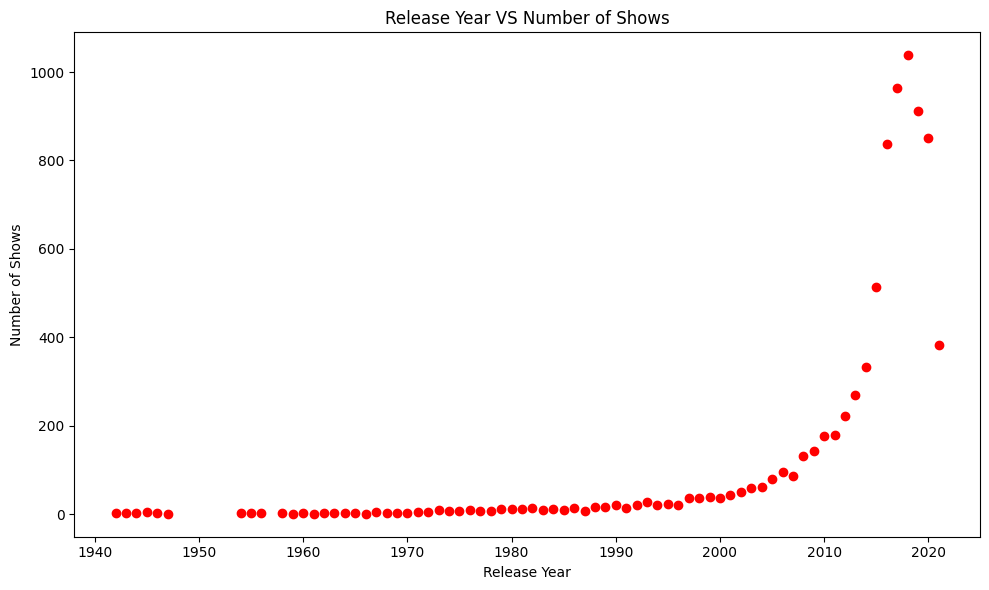

In [19]:
# scatter plot -> release year vs number of shows
release_counts = df["release_year"].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.scatter(release_counts.index, release_counts.values, color="red")
plt.title("Release Year VS Number of Shows")
plt.xlabel("Release Year")
plt.ylabel("Number of Shows")
plt.tight_layout()
plt.savefig("release_year_vs_number_of_shows.png", dpi=300, bbox_inches="tight")
plt.show()

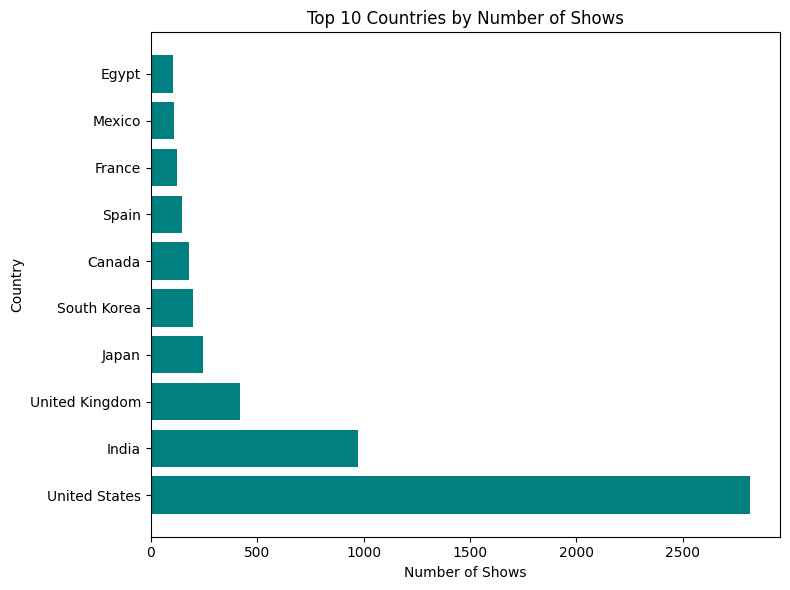

In [20]:
# top 10 countries where number of shows are most -> horizontal bar chart
country_counts = df["country"].value_counts().head(10)
plt.figure(figsize=(8, 6))
plt.barh(country_counts.index, country_counts.values, color="teal")
plt.title("Top 10 Countries by Number of Shows")
plt.xlabel("Number of Shows")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig("top10_countries.png", dpi=300, bbox_inches="tight")
plt.show()

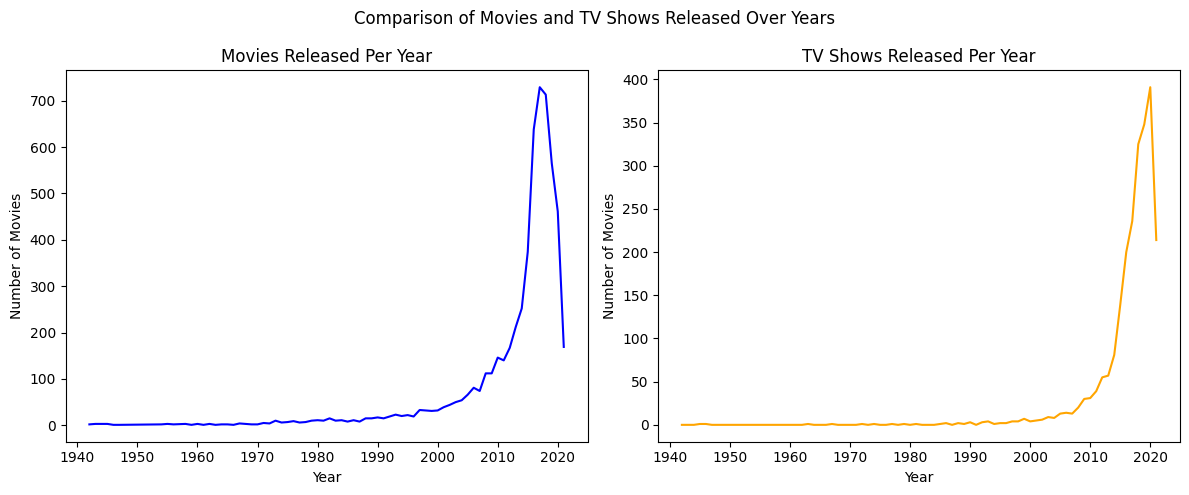

In [23]:
# movies vs tv shows per year -> subplot
content_by_year = df.groupby(["release_year", "type"]).size().unstack().fillna(0)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# first subplot -> movies
ax[0].plot(content_by_year.index, content_by_year["Movie"], color="blue")
ax[0].set_title("Movies Released Per Year")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Number of Movies")

# second subplot -> tv shows
ax[1].plot(content_by_year.index, content_by_year["TV Show"], color="orange")
ax[1].set_title("TV Shows Released Per Year")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Number of Movies")

fig.suptitle("Comparison of Movies and TV Shows Released Over Years")

plt.tight_layout()
plt.savefig("movies_tv_shows_comparison.png", dpi=300, bbox_inches="tight")
plt.show()